## Importing Important Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [10]:
total = 300
positive = 220
negative = 80

# Gini before split
p_pos = positive / total
p_neg = negative / total
gini_before = 1 - p_pos**2 - p_neg**2
print(f"Gini before split: {gini_before:.4f}")

# Left subset
left_total = 100
left_pos = 90
left_neg = 10
p_left_pos = left_pos / left_total
p_left_neg = left_neg / left_total
gini_left = 1 - p_left_pos**2 - p_left_neg**2
print(f"Gini (Left subset): {gini_left:.4f}")

# Right subset
right_total = 200
right_pos = 100
right_neg = 100
p_right_pos = right_pos / right_total
p_right_neg = right_neg / right_total
gini_right = 1 - p_right_pos**2 - p_right_neg**2
print(f"Gini (Right subset): {gini_right:.4f}")

# Weighted Gini after split
gini_split = (left_total / total) * gini_left + (right_total / total) * gini_right
print(f"Weighted Gini after split: {gini_split:.4f}")

# Conclusion
if gini_split < gini_before:
    print("The split improves purity.")
else:
    print("The split does NOT improve purity.")


Gini before split: 0.3911
Gini (Left subset): 0.1800
Gini (Right subset): 0.5000
Weighted Gini after split: 0.3933
The split does NOT improve purity.


## Question 2

In [11]:
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8],
    'X2': [5, 6, 8, 10, 12, 15, 18, 20],
    'Y':  [10, 12, 15, 18, 21, 25, 28, 30]
})

# Identify split points (midpoints between consecutive values of X1)
split_points = [(data['X1'][i] + data['X1'][i+1]) / 2 for i in range(len(data['X1']) - 1)]

# Define function to compute SSE
def compute_sse(y):
    mean_y = np.mean(y)
    return np.sum((y - mean_y) ** 2)

# Evaluate all split points
results = []
for split in split_points:
    left_y = data[data['X1'] <= split]['Y']
    right_y = data[data['X1'] > split]['Y']
    sse_left = compute_sse(left_y)
    sse_right = compute_sse(right_y)
    total_sse = sse_left + sse_right
    results.append((split, sse_left, sse_right, total_sse))

# Store and display results
results_df = pd.DataFrame(results, columns=['Split', 'SSE_Left', 'SSE_Right', 'Total_SSE'])
best_split = results_df.loc[results_df['Total_SSE'].idxmin()]

# Output
print("All split SSEs:\n", results_df)
print("\nBest split based on minimum SSE:\n", best_split)


All split SSEs:
    Split    SSE_Left   SSE_Right   Total_SSE
0    1.5    0.000000  271.428571  271.428571
1    2.5    2.000000  170.833333  172.833333
2    3.5   12.666667   97.200000  109.866667
3    4.5   36.750000   46.000000   82.750000
4    5.5   78.800000   12.666667   91.466667
5    6.5  158.833333    2.000000  160.833333
6    7.5  265.714286    0.000000  265.714286

Best split based on minimum SSE:
 Split         4.50
SSE_Left     36.75
SSE_Right    46.00
Total_SSE    82.75
Name: 3, dtype: float64


In [12]:
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8],
    'X2': [5, 6, 8, 10, 12, 15, 18, 20],
    'Y':  [10, 12, 15, 18, 21, 25, 28, 30]
})

# Best split based on earlier SSE analysis
split_value = 4.5

# Split the data
left_node = data[data['X1'] <= split_value]
right_node = data[data['X1'] > split_value]

# Calculate predictions for each node (mean of Y)
left_prediction = left_node['Y'].mean()
right_prediction = right_node['Y'].mean()

# Print structure
print("First Split of Regression Tree based on X1 <= 4.5:")
print("\nIf X1 <= 4.5:")
print(f"  Predict Y = {left_prediction:.2f}")
print("\nElse (X1 > 4.5):")
print(f"  Predict Y = {right_prediction:.2f}")

# Optional: attach predicted Y back to original data based on split
data['Predicted_Y'] = data['X1'].apply(lambda x: left_prediction if x <= split_value else right_prediction)
print("\nData with Predictions:\n", data)


First Split of Regression Tree based on X1 <= 4.5:

If X1 <= 4.5:
  Predict Y = 13.75

Else (X1 > 4.5):
  Predict Y = 26.00

Data with Predictions:
    X1  X2   Y  Predicted_Y
0   1   5  10        13.75
1   2   6  12        13.75
2   3   8  15        13.75
3   4  10  18        13.75
4   5  12  21        26.00
5   6  15  25        26.00
6   7  18  28        26.00
7   8  20  30        26.00


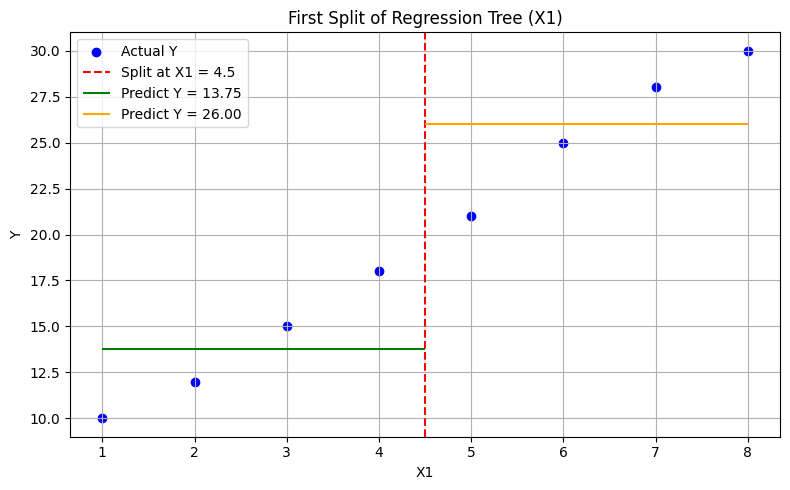

In [13]:
# Best split
split_value = 4.5
left_mean = data[data['X1'] <= split_value]['Y'].mean()
right_mean = data[data['X1'] > split_value]['Y'].mean()

# Scatter plot of actual data
plt.figure(figsize=(8, 5))
plt.scatter(data['X1'], data['Y'], color='blue', label='Actual Y')
plt.axvline(x=split_value, color='red', linestyle='--', label='Split at X1 = 4.5')

# Plot horizontal prediction lines
plt.hlines(y=left_mean, xmin=min(data['X1']), xmax=split_value, color='green', label=f'Predict Y = {left_mean:.2f}')
plt.hlines(y=right_mean, xmin=split_value, xmax=max(data['X1']), color='orange', label=f'Predict Y = {right_mean:.2f}')

# Plot formatting
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("First Split of Regression Tree (X1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
